<a href="https://colab.research.google.com/github/alvafox/Aprendizaje-supervizado/blob/main/DecisionTreeClassifier_(OE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificador de Objetivos de Estudio (Decision Tree Classifier)**

## Importar librerías
---

In [1]:
# importar bibliotecas
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import string
import numpy as np

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

In [2]:
!pip install ftfy
import ftfy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 3.5 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
import pandas as pd
df = pd.read_csv("/gdrive/MyDrive/INSUMOS/DOCTORADOS (2021-2023).csv", sep=";", encoding="latin1")
df = df.fillna("-")
df

,AÑO,FOLIO,COMITÉ INICIAL (TP),COMITÉ DEFINITIVO (L2),OBJETIVO,PROGRAMA,PALABRAS 1,PALABRAS 2,PALABRAS 3
0,2021,21210001,Ecología y Ciencias Naturales,Ecología y Ciencias Naturales,"Contaminación, tecnología y remediación del ag...",Doctorado en Ciencias Ambientales mención Sist...,"2513 Ciencias Ambientales - 1 Tratamiento, dep...",2513 Ciencias Ambientales - 18 Gestión de resi...,-
1,2021,21210002,Cs. de la Ingeniería II,Cs. de la Ingeniería II,La pérdida de piezas dentales afecta la calida...,Doctorado en Ingeniería Metalúrgica,3312 Tecnología de materiales - 12 Ensayos de ...,3315 Tecnología metalúrgica - 11 Pulvimetalurgia,-
2,2021,21210003,Biología Celular y Molecular,Biología Celular y Molecular,La lesión de médula espinal (LME) es una condi...,Doctorado en Ciencias Biológicas mención Biolo...,2407 Biología celular - 01 Cultivo celular,2407 Biología celular - 05 Cultivo de tejidos,2407 Biología celular - 06 Regeneración tisular
3,2021,21210004,Cs. Políticas y Estudios Internacionales,Derecho,La evaluación del cumplimiento efectivo que se...,Doctorado en Ciencia Política,5905 Política Comparada - 01 Instituciones Pol...,-,-
4,2021,21210005,Administración,Administración,1.- Debido al rol que cumplen las IES en la fo...,Doctorado en Ciencias Humanas,"6103 Psicología industrial, del trabajo y de l...",-,-
...,...,...,...,...,...,...,...,...,...
6225,2023,21232432,Biotecnología,Biotecnología,La flavobacteriosis es una enfermedad provocad...,Doctorado en Biotecnología,"2412 Inmunología (ver 2302.16, 3109.03, 3207.1...","2412 Inmunología (ver 2302.16, 3109.03, 3207.1...",-
6226,2023,21232435,Filosofía,Filosofía,Mi objetivo de estudio consiste en elaborar un...,Doctorado en Filosofía con mención en Filosofía,7201 Filosofía del conocimiento - 02 Epistemol...,7202 Antropología filosófica - 07 Filosofía de...,7207 Filosofía social - 01 Filosofia de la cul...
6227,2023,21232438,Derecho,Derecho,\r\nEstoy desarrollando mi investigación de D...,Doctorado en Derecho,5699 Otras especialidades jurídicas - otras,-,-
6228,2023,21232439,Agronomía y Forestal,Agronomía y Forestal,La tesis se alinea con el objetivo del program...,Doctorado en Ciencias de la Agricultura,3103 Agronomía (ver 2417 y 5312.01 ) - 04 Prot...,3103 Agronomía (ver 2417 y 5312.01 ) - 05 Técn...,-


In [5]:
# preparar los datos
objetivos = df["OBJETIVO"]
comites_despues = df["COMITÉ DEFINITIVO (L2)"]

Eliminaremos algunas palabras.

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('spanish'))
print(stopwords)
stopwords.update(["embargo", "además", "través", "estudio", "mediante", "propuesta", "debido", "investigación", \
                  "chile", "proceso", "objetivo", "desarrollo", "trabajo", "así", "forma", "línea", "contexto", "tipo",\
                  "importante", "diferente", "posible", "manera", "dentro", "sido", "ello", "sistema", "modelo", "uso",\
                  "parte", "efecto", "proyecto", "problema", "estudios", "análisis","procesos", "área", "parte", \
                  "producción", "conocimiento", "relación", "año", "caso", "dato", "datos", "cambio", "sistemas", \
                  "resultado", "partir", "base", "grupo", "diferentes", "estructura", "mecanismo", "evaluar",\
                  "doctorado", "ejemplo", "cuales", "analizar", "impacto", "siendo", "si", "pueden", "frente",\
                  "método", "mayor", "actualmente", "existe", "principalmente", "presente", "gran", "solo", "punto",\
                  "bien", "sino", "años", "lado", "fin", "basado", "ser", "puede", "respecto", "vez", "mismo", "estudiar",\
                  "formación", "información", "país", "tiempo", "teoría", "interés", "determinar", "desarrollar", "resultados"\
                  "persona", "último", "cómo", "condicione", "medio", "respuesta", "estrategia", "general", "nivel", "programa",\
                  "experiencia", "bajo", "control", "producto", "capacidad", "nuevo", "nueva", "enfoque", "aporte", "problemas",\
                  "factores", "generar", "cabo", "debe", "podría", "realizar", "cada", "rol", "et", "and"])

stopwords= list(stopwords)
print(stopwords)

def clean(doc): # doc is a string of text
    doc = ftfy.fix_text(doc)
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = doc.replace("\n", "") 
    doc = doc.replace("\n\n", "") 
    doc = doc.replace("\n\n\n", "") 
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

{'sois', 'hubiste', 'tendrían', 'habréis', 'un', 'de', 'habida', 'fui', 'ellas', 'estén', 'habéis', 'ha', 'estoy', 'tenidas', 'nuestras', 'tienes', 'estada', 'fuera', 'tuviésemos', 'quienes', 'estas', 'vuestros', 'habidos', 'tienen', 'ellos', 'hubo', 'ni', 'estuvisteis', 'fuésemos', 'tuvo', 'estuvierais', 'la', 'esas', 'fuese', 'desde', 'tendrías', 'tened', 'sentidos', 'hubimos', 'entre', 'uno', 'estamos', 'le', 'durante', 'ella', 'estad', 'fueras', 'tendremos', 'habíais', 'cual', 'sentida', 'tendrán', 'tengas', 'hubieron', 'donde', 'ese', 'estuviésemos', 'sin', 'tuvieseis', 'estará', 'hubiese', 'tenida', 'ti', 'tenías', 'teníais', 'todos', 'estés', 'hubieseis', 'este', 'por', 'está', 'estuviera', 'tendré', 'seremos', 'serán', 'esté', 'hube', 'soy', 'nuestros', 'todo', 'fue', 'otras', 'otra', 'tuvieras', 'suyo', 'fuéramos', 'tendríamos', 'estadas', 'será', 'estarás', 'era', 'pero', 'estuvieras', 'para', 'había', 'o', 'fuiste', 'suyos', 'seré', 'estáis', 'habían', 'serían', 'tu', 'tuvis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Vectorización de los datos
---

A continuación, utilizamos la técnica de Bolsa de Palabras para extraer características de los objetivos de estudio

In [7]:
#caracteristicas = vectorizer.fit_transform(objetivos).toarray()

# Vectorizar las características de texto
vectorizer = CountVectorizer(preprocessor=clean)

#caracteristicas = np.hstack((objetivos_vec, programas_vec, palabras_uno_vec, palabras_dos_vec, palabras_tres_vec ))
caracteristicas = vectorizer.fit_transform(objetivos).toarray()

In [8]:
caracteristicas.shape

(6230, 105894)

En este código, utilizamos CountVectorizer para convertir los objetivos de estudio en una matriz de características de Bolsa de Palabras. La función fit_transform ajusta el vectorizador a los datos de entrada y luego lo utiliza para transformar los objetivos de estudio en una matriz de características. La función toarray convierte la matriz de características en un arreglo NumPy.

A continuación, definimos las etiquetas correspondientes a cada par de comités antes y después del cambio:

In [9]:
# etiquetas
etiquetas = []
for i in range(len(objetivos)):
  #etiquetas.append(comites_antes[i] + "-" + comites_despues[i])
  etiquetas.append(comites_despues[i])

## División de los datos para entrenamiento y predicción
---

Después, dividimos los datos en conjuntos de entrenamiento y prueba:

In [10]:
# dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, etiquetas, test_size=0.2, random_state=42)

## Selección del modelo
---

Seleccionamos el modelo y lo entrenamos:

In [11]:
# seleccionar el modelo
modelo = DecisionTreeClassifier()

## Entrenamiento
---

In [12]:
import time

start = time.time()

# entrenar el modelo
modelo.fit(X_train, y_train)

end = time.time()

total = end - start

print("Tiempo transcurrido:", round(total/60,1), "minutos")

display(modelo.fit(X_train, y_train))

Tiempo transcurrido: 4.7 minutos


DecisionTreeClassifier()

Finalmente, evaluamos el modelo.

In [13]:
# evaluar el modelo
y_pred = modelo.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(precision * 100))

Precisión del modelo: 40.77%


In [14]:
comites = list(df["COMITÉ DEFINITIVO (L2)"].unique())
comites.sort()
display(comites)

['Administración',
 'Agronomía y Forestal',
 'Arquitectura',
 'Arte',
 'Biología Celular y Molecular',
 'Biología Fisiológica y Bioquímica',
 'Biotecnología',
 'Computación e Informática',
 'Comunicación',
 'Cs. Matemáticas',
 'Cs. Médicas',
 'Cs. Políticas y Estudios Internacionales',
 'Cs. Químicas',
 'Cs. Veterinarias',
 'Cs. de la Ingeniería I',
 'Cs. de la Ingeniería II',
 'Derecho',
 'Diseño',
 'Ecología y Ciencias Naturales',
 'Economía',
 'Educación I',
 'Educación II',
 'Filosofía',
 'Física y Astronomía',
 'Geología y Oceanografía',
 'Historia, Antropología y Arqueología',
 'Letras',
 'Políticas Públicas y Administración del Estado',
 'Psicología',
 'Sociología',
 'Urbanismo y Asentamientos Humanos']

## Matriz de confusión
---

<ipython-input-15-287a2fcf83a0>:13: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


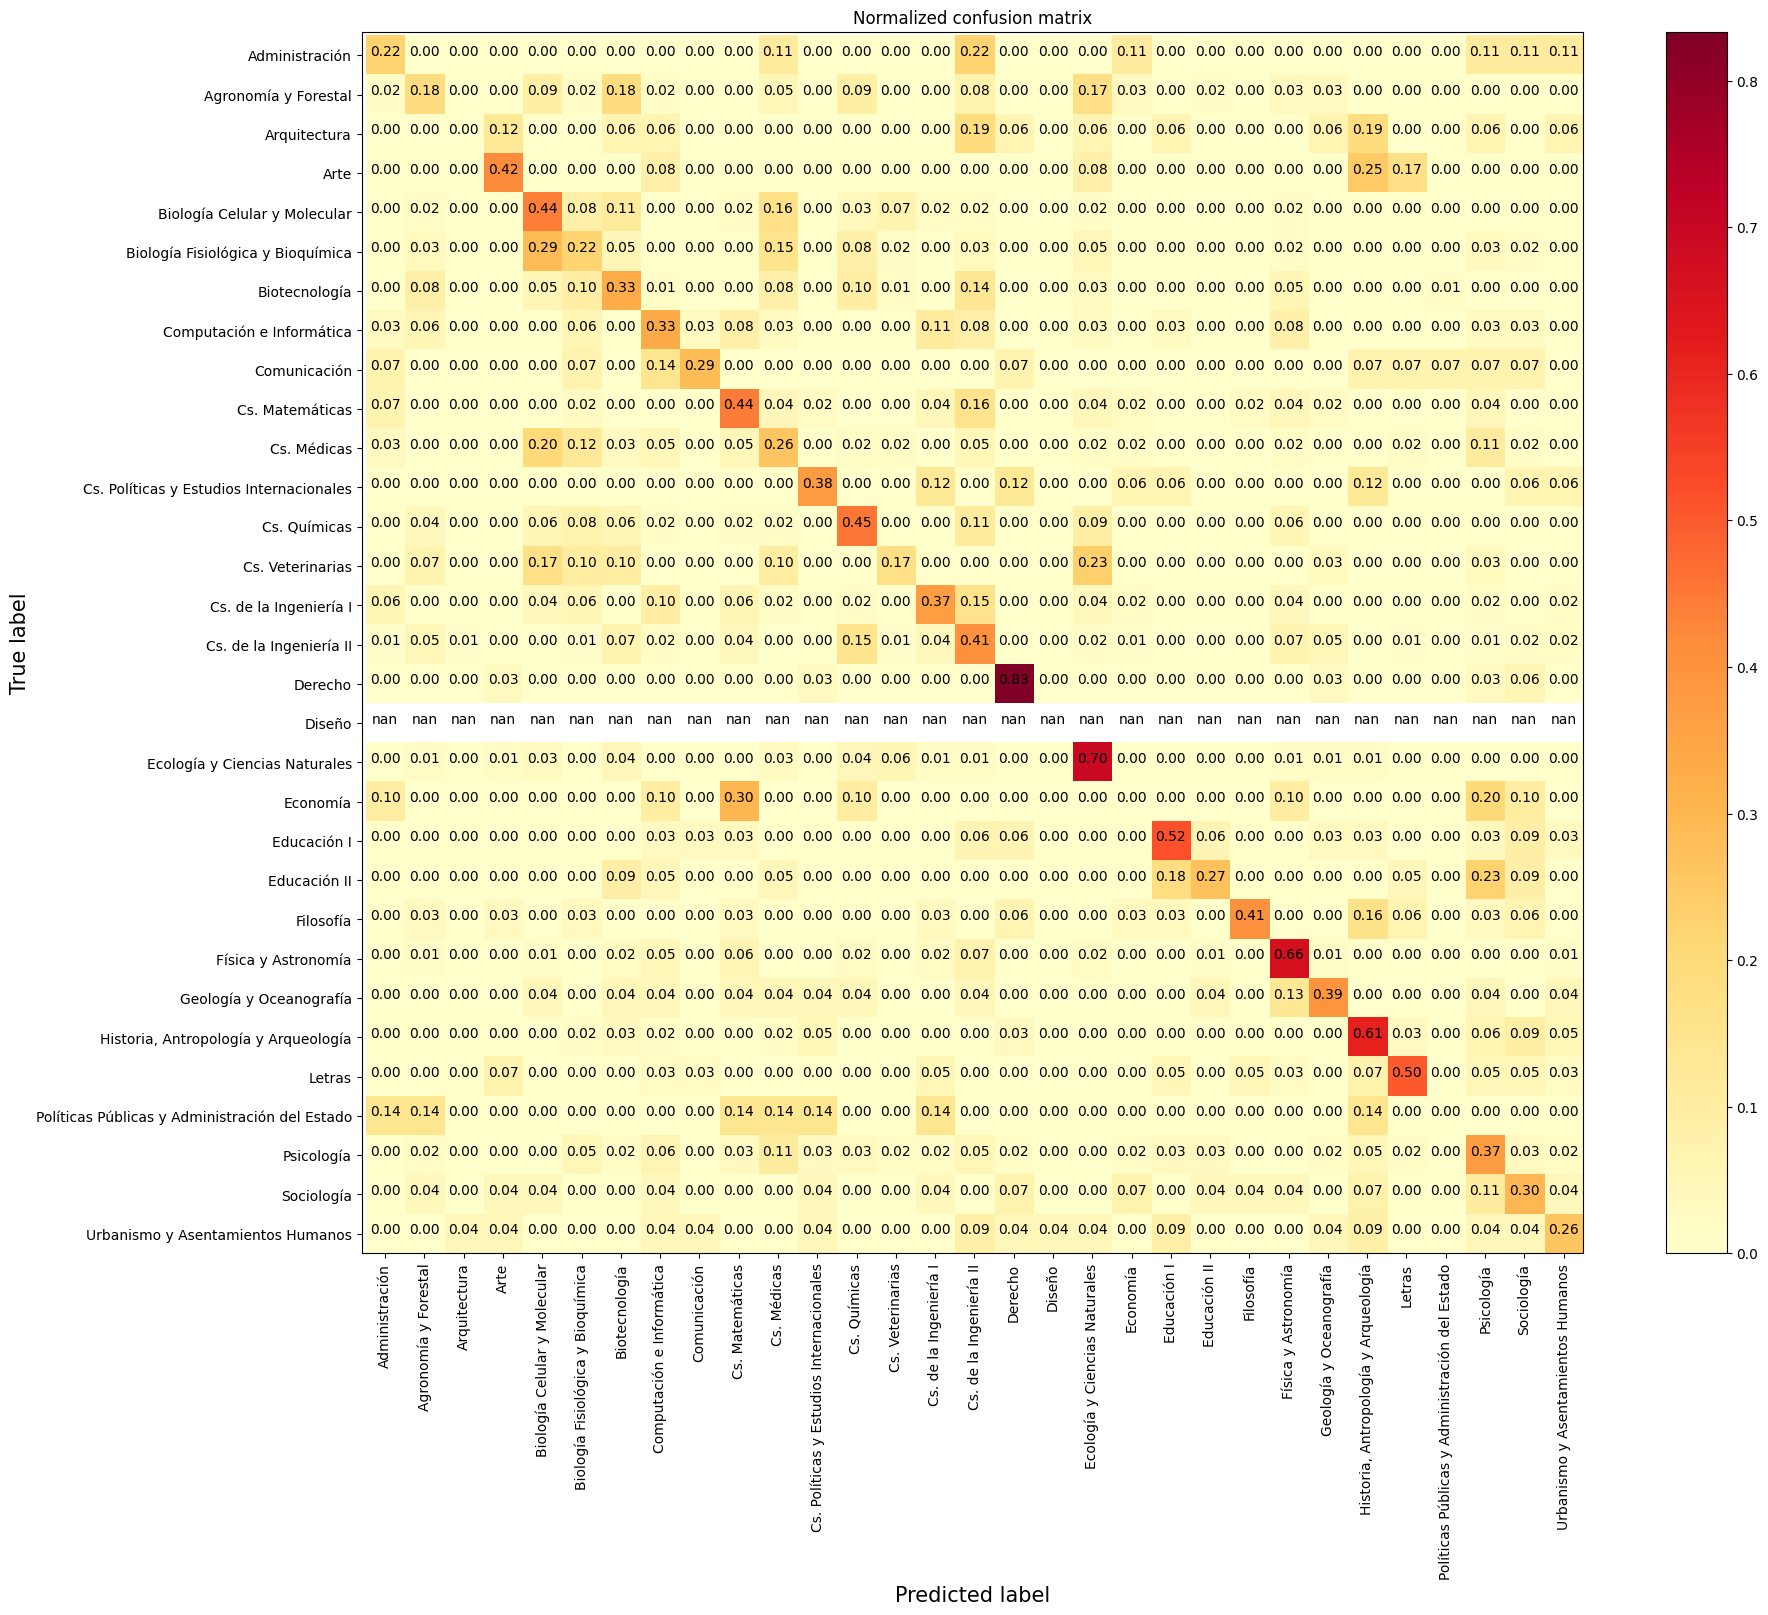

In [15]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.YlOrRd):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Ajustar los límites de los ejes x e y
    plt.xlim(-0.6, len(classes)-0.5)
    plt.ylim(len(classes)-0.5, -0.6)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)

# Ejemplo de uso:
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,16))
plot_confusion_matrix(cnf_matrix, classes=comites, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [ ]:
# calculate AUC: Area under the curve(AUC) gives idea about the model efficiency:
# Further information: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
#X_test_dtm = vectorizer.transform(X_test)
#y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
#print("ROC_AOC_Score: ", roc_auc_score(y_test, y_pred_prob))

In [17]:
cnf_matrix.shape

(31, 31)

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

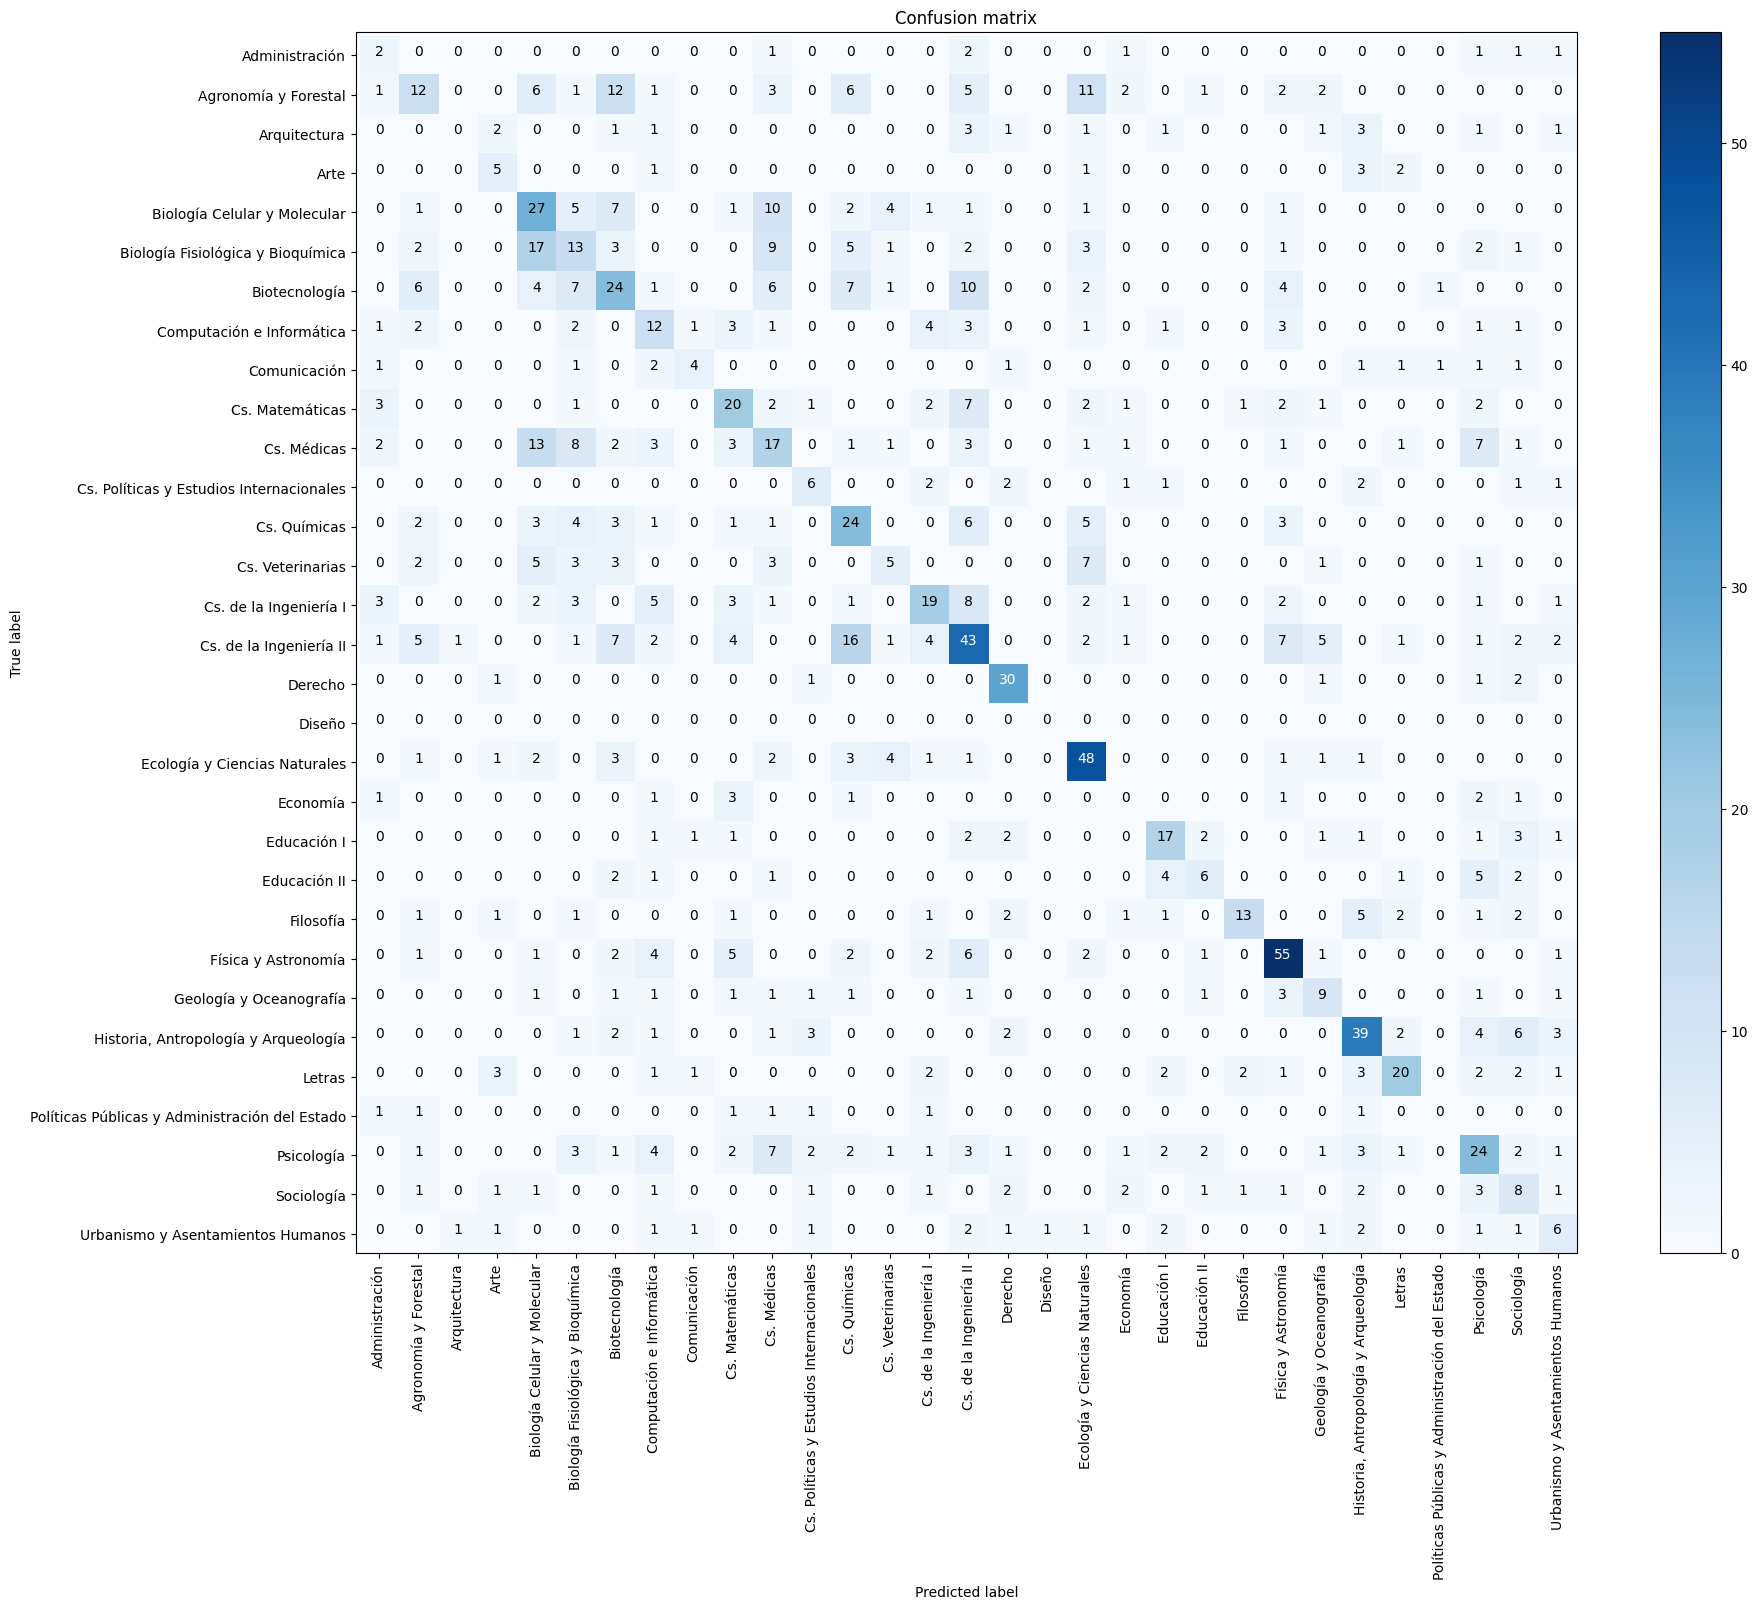

In [20]:
plt.figure(figsize=(20,16))
# Ajustar los límites de los ejes x e y
plt.xlim(-0.6, len(comites)-0.5)
plt.ylim(len(comites)-0.5, -0.6)
plot_confusion_matrix(y_test, y_pred, classes=comites)

## Predicción
---

Hacemos una predicción utilizando los datos de una postulación individual:

In [41]:
n = 394

print("COMITÉ INICIAL (TP) =>", df["COMITÉ INICIAL (TP)"][n])
print("COMITÉ DEFINITIVO (L2) =>", df["COMITÉ DEFINITIVO (L2)"][n])
print("PROGRAMA =>",df["PROGRAMA"][n])
print("PALABRAS 1 =>",df["PALABRAS 1"][n])
print("PALABRAS 2 =>",df["PALABRAS 2"][n])
print("PALABRAS 3 =>",df["PALABRAS 3"][n])
print("OBJETIVO =>",df["OBJETIVO"][n])

COMITÉ INICIAL (TP) => Filosofía
COMITÉ DEFINITIVO (L2) => Letras
PROGRAMA => Doctorado en Estudios Interdisciplinarios sobre Pensamiento, cultura y sociedad
PALABRAS 1 => 6301 Sociología cultural - 09 Sociología de la literatura
PALABRAS 2 => 7207 Filosofía social - 04 Filosofía política (ver 5903)
PALABRAS 3 => -
OBJETIVO => Escrituras y memorias: una reivindicación de las mujeres víctimas del conflicto armado en Colombia, en la literatura de Albalucía Ángel y Marbel Sandoval Ordoñez.  

Línea de investigación: Cultura política, memoria y derechos humanos. 
Esta investigación tiene como objetivo plantear una ética de la memoria a través del acto de escribir de la mujer, para entender cómo la mujer se reconoce y reconoce a las otras mujeres marginadas en la creación literaria colombiana, específicamente buscamos respuesta a: ¿Cómo la escritura hecha por mujeres transmite y hace memoria del conflicto armado colombiano? Para tal efecto, centraremos nuestro trabajo en la noción de escrit

In [42]:
# utilizar el modelo
comite_inicial = [df["COMITÉ INICIAL (TP)"][n]]
comite_final = [df["COMITÉ DEFINITIVO (L2)"][n]]
folio = [df["FOLIO"][n]]

caracteristicas_nuevo = vectorizer.transform(objetivo_nuevo).toarray()
print(caracteristicas_nuevo.shape)
comite_predicho = modelo.predict(caracteristicas_nuevo)

print(f"El folio {folio} perteniecía a {comite_inicial} y ahora corresponde a {comite_final} | El modelo pronostica => {comite_predicho}")

(1, 105894)
El folio [21210395] perteniecía a ['Filosofía'] y ahora corresponde a ['Letras'] | El modelo pronostica => ['Letras']


In [23]:
for index, row in df.iterrows():
  objetivo = [row["OBJETIVO"]]
  objetivo_vec = vectorizer.transform(objetivo).toarray()
  caracteristicas_nuevo = objetivo_vec
  comite_predicho = modelo.predict(caracteristicas_nuevo)
  df.at[index, "COMITÉ SUGERIDO (DecisionTreeClassifier)"] = comite_predicho

In [24]:
df

,AÑO,FOLIO,COMITÉ INICIAL (TP),COMITÉ DEFINITIVO (L2),OBJETIVO,PROGRAMA,PALABRAS 1,PALABRAS 2,PALABRAS 3,COMITÉ SUGERIDO (DecisionTreeClassifier)
0,2021,21210001,Ecología y Ciencias Naturales,Ecología y Ciencias Naturales,"Contaminación, tecnología y remediación del ag...",Doctorado en Ciencias Ambientales mención Sist...,"2513 Ciencias Ambientales - 1 Tratamiento, dep...",2513 Ciencias Ambientales - 18 Gestión de resi...,-,[Ecología y Ciencias Naturales]
1,2021,21210002,Cs. de la Ingeniería II,Cs. de la Ingeniería II,La pérdida de piezas dentales afecta la calida...,Doctorado en Ingeniería Metalúrgica,3312 Tecnología de materiales - 12 Ensayos de ...,3315 Tecnología metalúrgica - 11 Pulvimetalurgia,-,[Cs. de la Ingeniería II]
2,2021,21210003,Biología Celular y Molecular,Biología Celular y Molecular,La lesión de médula espinal (LME) es una condi...,Doctorado en Ciencias Biológicas mención Biolo...,2407 Biología celular - 01 Cultivo celular,2407 Biología celular - 05 Cultivo de tejidos,2407 Biología celular - 06 Regeneración tisular,[Biología Celular y Molecular]
3,2021,21210004,Cs. Políticas y Estudios Internacionales,Derecho,La evaluación del cumplimiento efectivo que se...,Doctorado en Ciencia Política,5905 Política Comparada - 01 Instituciones Pol...,-,-,[Derecho]
4,2021,21210005,Administración,Administración,1.- Debido al rol que cumplen las IES en la fo...,Doctorado en Ciencias Humanas,"6103 Psicología industrial, del trabajo y de l...",-,-,[Administración]
...,...,...,...,...,...,...,...,...,...,...
6225,2023,21232432,Biotecnología,Biotecnología,La flavobacteriosis es una enfermedad provocad...,Doctorado en Biotecnología,"2412 Inmunología (ver 2302.16, 3109.03, 3207.1...","2412 Inmunología (ver 2302.16, 3109.03, 3207.1...",-,[Ecología y Ciencias Naturales]
6226,2023,21232435,Filosofía,Filosofía,Mi objetivo de estudio consiste en elaborar un...,Doctorado en Filosofía con mención en Filosofía,7201 Filosofía del conocimiento - 02 Epistemol...,7202 Antropología filosófica - 07 Filosofía de...,7207 Filosofía social - 01 Filosofia de la cul...,[Arte]
6227,2023,21232438,Derecho,Derecho,\r\nEstoy desarrollando mi investigación de D...,Doctorado en Derecho,5699 Otras especialidades jurídicas - otras,-,-,[Derecho]
6228,2023,21232439,Agronomía y Forestal,Agronomía y Forestal,La tesis se alinea con el objetivo del program...,Doctorado en Ciencias de la Agricultura,3103 Agronomía (ver 2417 y 5312.01 ) - 04 Prot...,3103 Agronomía (ver 2417 y 5312.01 ) - 05 Técn...,-,[Agronomía y Forestal]


## Exportar datos
---

In [27]:
df.to_csv("/gdrive/MyDrive/PRODUCTOS/PREDICCIONES (DecisionTreeClassifier).csv", sep=";",encoding="latin1")

In [28]:
from google.colab import files
files. download("/gdrive/MyDrive/PRODUCTOS/PREDICCIONES (DecisionTreeClassifier).csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>